In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

TEXT_DATA = pd.read_csv("/data/anies.csv")
TEXT_DATA.head()

,created_at,username,text
0,Fri Sep 22 16:05:37 +0000 2023,DahrinOde,Saya merasa sedih klu tokoh perempuan NU terba...
1,Mon Sep 18 08:38:13 +0000 2023,frenkyf1,@CutSarina5 @Puspen_TNI Ada dari keluarga kera...
2,Fri Sep 01 02:37:57 +0000 2023,MulyadiSaediman,@SlametR06751672 Anies berhaji bukan di undang...
3,Mon Aug 14 02:10:48 +0000 2023,AbaJijeh,"@ch_chotimah2 @erickthohir Haha, yg jlsÂ² aj p..."
4,Wed Aug 09 16:05:41 +0000 2023,Orang_dalam10,Anies bersana keluarga selain menunaikan ibada...


In [ ]:
# ------ Case Folding --------

TEXT_DATA['prepros_text'] = TEXT_DATA['text'].str.lower()


print('Case Folding Result : \n')
print(TEXT_DATA['prepros_text'].head(5))
print('\n\n\n')

Case Folding Result : 

0    saya merasa sedih klu tokoh perempuan nu terba...
1    @cutsarina5 @puspen_tni ada dari keluarga kera...
2    @slametr06751672 anies berhaji bukan di undang...
3    @ch_chotimah2 @erickthohir haha, yg jlsâ² aj p...
4    anies bersana keluarga selain menunaikan ibada...
Name: prepros_text, dtype: object






In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import string
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

#pra pemrosesan data
def remove_text_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_text_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_number)

#remove punctuation [tanda baca]
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

TEXT_DATA['prepros_text'] = TEXT_DATA['prepros_text'].apply(remove_singl_char)

# ------ Tokenizing ---------

# NLTK word rokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

TEXT_DATA['text_tokens'] = TEXT_DATA['prepros_text'].apply(word_tokenize_wrapper)

print('Removal Punctuation : \n')
print(TEXT_DATA['prepros_text'].head())
print('\n')

print('Tokenizing Result : \n')
print(TEXT_DATA['text_tokens'].head())
print('\n\n\n')

Removal Punctuation : 

0    saya merasa sedih klu tokoh perempuan nu terba...
1    tni ada dari keluarga kerajaan arab saudi masi...
2    anies berhaji bukan di undang oleh kerajaan ta...
3    chotimah haha yg jls aj pak anies diundang ker...
4    anies bersana keluarga selain menunaikan ibada...
Name: prepros_text, dtype: object


Tokenizing Result : 

0    [saya, merasa, sedih, klu, tokoh, perempuan, n...
1    [tni, ada, dari, keluarga, kerajaan, arab, sau...
2    [anies, berhaji, bukan, di, undang, oleh, kera...
3    [chotimah, haha, yg, jls, aj, pak, anies, diun...
4    [anies, bersana, keluarga, selain, menunaikan,...
Name: text_tokens, dtype: object






In [ ]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

TEXT_DATA['text_tokens_fdist'] = TEXT_DATA['text_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(TEXT_DATA['text_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(jawa, 2), (timur, 2), (menjadi, 2), (saya, 1...
1    [(arab, 2), (saudi, 2), (dan, 2), (indonesia, ...
2    [(di, 4), (anies, 2), (kerajaan, 2), (bisa, 2)...
3    [(arab, 2), (chotimah, 1), (haha, 1), (yg, 1),...
4    [(anies, 2), (haji, 2), (bersana, 1), (keluarg...
Name: text_tokens_fdist, dtype: object


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project Ujaran Kebencian/stopwordsID.csv", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
# convert list to dictionary
list_stopwords = set(list_stopwords)
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
TEXT_DATA['text_tokens_WSW'] = TEXT_DATA['text_tokens'].apply(stopwords_removal)

print('Stopword Result : \n')
print(TEXT_DATA['text_tokens_WSW'].head())

Stopword Result : 

0    [sedih, klu, tokoh, perempuan, nu, terbaik, ja...
1    [tni, keluarga, kerajaan, arab, saudi, keturun...
2    [anies, berhaji, undang, kerajaan, travel, plu...
3    [chotimah, haha, jls, aj, anies, diundang, ker...
4    [anies, bersana, keluarga, menunaikan, ibadah,...
Name: text_tokens_WSW, dtype: object


In [ ]:
!pip install xlrd
!pip install openpyxl

In [ ]:
normalizad_word = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Project Ujaran Kebencian/normalisasi.xlsx", engine='openpyxl')

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

TEXT_DATA['text_normalized'] = TEXT_DATA['text_tokens_WSW'].apply(normalized_term)

TEXT_DATA['text_normalized'].head(10)

0    [sedih, kalau, tokoh, perempuan, nahdatululama...
1    [tentaranasionalindonesia, keluarga, kerajaan,...
2    [anies, berhaji, undang, kerajaan, travel, plu...
3    [chotimah, tertawa, jelas, aja, anies, diundan...
4    [anies, bersana, keluarga, menunaikan, ibadah,...
5    [anies, bersana, keluarga, menunaikan, ibadah,...
6    [pas, melihat, postingan, anies, bersana, kelu...
7    [capres, anies, bersana, keluarga, menunaikan,...
8    [anies, bersana, keluarga, menunaikan, ibadah,...
9    [lawannya, anies, ganjar, atau, prabowo, pemer...
Name: text_normalized, dtype: object

In [ ]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=7aa330d16b1ce56b603c7701dcd93c6b15a0cd68d2e25667210fc889b454c68e
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
!pip install pandas numpy matplotlib Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)
term_dict = {}
for document in TEXT_DATA['text_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
print(term_dict)
print("------------------------")
# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

TEXT_DATA['text_tokens_stemmed'] = TEXT_DATA['text_normalized'].swifter.apply(get_stemmed_term)
print(TEXT_DATA['text_tokens_stemmed'])

Streaming output truncated to the last 5000 lines.
moncong : moncong
ngajak : ngajak
nyinyirin : nyinyirin
ntuh : ntuh
azan : azan
kemusyrikan : musyrik
bacotin : bacotin
poirot : poirot
kesirikan : siri
tergolong : golong
radikal : radikal
sk : sk
diterbitkan : terbit
diumumkan : umum
lembaran : lembar
dibatalkan : batal
diptunkan : diptunkan
surganya : surga
manjur : manjur
dicelup : celup
diminumin : diminumin
shalat : shalat
kadroen : kadroen
berrti : berrti
mnyesatkan : mnyesatkan
droen : droen
kenapa : kenapa
sibajingan : sibajingan
dsn : dsn
droeeeen : droeeeen
matamu : mata
dimenangkan : menang
dslam : dslam
yaah : yaah
kutub : kutub
bintang : bintang
kadrunista : kadrunista
mengisi : isi
nganggurnya : nganggurnya
keliling : keliling
maghrib : maghrib
bnyak : bnyak
meriang : meriang
gereja : gereja
komentarnya : komentar
kadrunini : kadrunini
nongol : nongol
adzankok : adzankok
men : men
identitastdk : identitastdk
tusesungguhnya : tusesungguhnya
munafiknaudzubillah : munafikna

Pandas Apply:   0%|          | 0/2520 [00:00<?, ?it/s]

0       [sedih, kalau, tokoh, perempuan, nahdatululama...
1       [tentaranasionalindonesia, keluarga, raja, ara...
2       [anies, haj, undang, raja, travel, plus, kadun...
3       [chotimah, tertawa, jelas, aja, anies, undang,...
4       [anies, sana, keluarga, tunai, ibadah, haji, u...
                              ...                        
2515                                      [semangat, gus]
2516                    [jiwa, pimpin, pimpin, amin, pkb]
2517                                               [akin]
2518                          [jiwa, pimpin, pimpin, pkb]
2519                          [jiwa, pimpin, pimpin, pkb]
Name: text_tokens_stemmed, Length: 2520, dtype: object


# Hasil Pre-Prosesing

In [ ]:
print('Original Text : \n')
print(TEXT_DATA['text'].loc[1], '\n')
print(TEXT_DATA['text'].loc[2], '\n')
print(TEXT_DATA['text'].loc[3], '\n\n')

# ------ Case Folding --------
TEXT_DATA['case_folding'] = TEXT_DATA['text'].str.lower()
print('Case Folding : \n')
print(TEXT_DATA['case_folding'].loc[1], '\n')
print(TEXT_DATA['case_folding'].loc[2], '\n')
print(TEXT_DATA['case_folding'].loc[3], '\n\n')

# ------ Removal Punctuation ---------
print('Removal Punctuation : \n')
print(TEXT_DATA['prepros_text'].loc[1], '\n')
print(TEXT_DATA['prepros_text'].loc[2], '\n')
print(TEXT_DATA['prepros_text'].loc[3], '\n\n')

# ------ Tokenizing ---------
print('Tokenizing : \n')
print(TEXT_DATA['text_tokens'].loc[1], '\n')
print(TEXT_DATA['text_tokens'].loc[2], '\n')
print(TEXT_DATA['text_tokens'].loc[3], '\n\n')

# ------ Stopword ---------
print('Stopword : \n')
print(TEXT_DATA['text_tokens_WSW'].loc[1], '\n')
print(TEXT_DATA['text_tokens_WSW'].loc[2], '\n')
print(TEXT_DATA['text_tokens_WSW'].loc[3], '\n\n')

# ------ Normalization ---------
print('Normalization : \n')
print(TEXT_DATA['text_normalized'].loc[1], '\n')
print(TEXT_DATA['text_normalized'].loc[2], '\n')
print(TEXT_DATA['text_normalized'].loc[3], '\n\n')

# ------ Stemming ---------
print('Stemming : \n')
print(TEXT_DATA['text_tokens_stemmed'].loc[1], '\n')
print(TEXT_DATA['text_tokens_stemmed'].loc[2], '\n')
print(TEXT_DATA['text_tokens_stemmed'].loc[3], '\n\n')

Original Text : 

@CutSarina5 @Puspen_TNI Ada dari keluarga kerajaan arab saudi masih keturunan raja dan besar di Indonesia sedang memperjuangkan ini dan sedang promosikan Anies jika ingin Anies jadi Presiden maka Arab Saudi harus All out mendukungnya tapi orang Indonesia gimana mau gak? 

@SlametR06751672 Anies berhaji bukan di undang oleh kerajaan tapi ikut travel plus . Krn sdh kadung bicara dpt undangan khusus kerajaan jd berdrama seterusnya.. askar bisa di bayar jg bisa atas permintaan dr Kedubes RI di Arab Saudi disana Anies punya kolega.. semua di atur dan kameramen bekerja 

@ch_chotimah2 @erickthohir Haha, yg jlsÂ² aj pak Anies diundang kerajaan arab pegi haji, disambut, dijamu pangeran arab, masih aja klian selewengkan macamÂ²..hidup koq se naif itu bong. 


Case Folding : 

@cutsarina5 @puspen_tni ada dari keluarga kerajaan arab saudi masih keturunan raja dan besar di indonesia sedang memperjuangkan ini dan sedang promosikan anies jika ingin anies jadi presiden maka arab sau

# Save to Drive

In [ ]:
TEXT_DATA.to_csv("Text_Preprocessing.csv")

In [ ]:
print('\nNormalized Result : \n')
print(TEXT_DATA['text_normalized'].head(10))

print('\nStemming Result : \n')
print(TEXT_DATA['text_tokens_stemmed'].head(10))


Normalized Result : 

0    [sedih, kalau, tokoh, perempuan, nahdatululama...
1    [tentaranasionalindonesia, keluarga, kerajaan,...
2    [anies, berhaji, undang, kerajaan, travel, plu...
3    [chotimah, tertawa, jelas, aja, anies, diundan...
4    [anies, bersana, keluarga, menunaikan, ibadah,...
5    [anies, bersana, keluarga, menunaikan, ibadah,...
6    [pas, melihat, postingan, anies, bersana, kelu...
7    [capres, anies, bersana, keluarga, menunaikan,...
8    [anies, bersana, keluarga, menunaikan, ibadah,...
9    [lawannya, anies, ganjar, atau, prabowo, pemer...
Name: text_normalized, dtype: object

Stemming Result : 

0    [sedih, kalau, tokoh, perempuan, nahdatululama...
1    [tentaranasionalindonesia, keluarga, raja, ara...
2    [anies, haj, undang, raja, travel, plus, kadun...
3    [chotimah, tertawa, jelas, aja, anies, undang,...
4    [anies, sana, keluarga, tunai, ibadah, haji, u...
5    [anies, sana, keluarga, tunai, ibadah, haji, u...
6    [pas, lihat, postingan, anies, san

## Proses TFIDF

In [ ]:
# load dataset
raw_data = pd.read_csv("/content/Text_Preprocessing.csv", usecols=["created_at", "username", "text", "prepros_text", "text_tokens_stemmed"])
raw_data.columns = ["created_at", "username", "text", "prepros_text", "text_tokens_stemmed"]
raw_data.head()

,created_at,username,text,prepros_text,text_tokens_stemmed
0,Fri Sep 22 16:05:37 +0000 2023,DahrinOde,Saya merasa sedih klu tokoh perempuan NU terba...,saya merasa sedih klu tokoh perempuan nu terba...,"['sedih', 'klu', 'tokoh', 'perempuan', 'nu', '..."
1,Mon Sep 18 08:38:13 +0000 2023,frenkyf1,@CutSarina5 @Puspen_TNI Ada dari keluarga kera...,tni ada dari keluarga kerajaan arab saudi masi...,"['tni', 'keluarga', 'raja', 'arab', 'saudi', '..."
2,Fri Sep 01 02:37:57 +0000 2023,MulyadiSaediman,@SlametR06751672 Anies berhaji bukan di undang...,anies berhaji bukan di undang oleh kerajaan ta...,"['anies', 'haj', 'undang', 'raja', 'travel', '..."
3,Mon Aug 14 02:10:48 +0000 2023,AbaJijeh,"@ch_chotimah2 @erickthohir Haha, yg jlsÂ² aj p...",chotimah haha yg jls aj pak anies diundang ker...,"['chotimah', 'haha', 'jls', 'aj', 'anies', 'un..."
4,Wed Aug 09 16:05:41 +0000 2023,Orang_dalam10,Anies bersana keluarga selain menunaikan ibada...,anies bersana keluarga selain menunaikan ibada...,"['anies', 'sana', 'keluarga', 'tunai', 'ibadah..."


In [ ]:
# convert list formated string to list
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

raw_data["text_list"] = raw_data["text_tokens_stemmed"].apply(convert_text_list)


#print(raw_data["text_list"][90])

#print("\ntype : ", type(raw_data["text_list"][90]))

In [ ]:
##Term Frequency (TF)


def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

raw_data["TF_dict"] = raw_data['text_list'].apply(calc_TF)

raw_data["TF_dict"].head()

0    {'sedih': 0.03225806451612903, 'klu': 0.032258...
1    {'tni': 0.047619047619047616, 'keluarga': 0.04...
2    {'anies': 0.07407407407407407, 'haj': 0.037037...
3    {'chotimah': 0.05, 'haha': 0.05, 'jls': 0.05, ...
4    {'anies': 0.125, 'sana': 0.0625, 'keluarga': 0...
Name: TF_dict, dtype: object

In [ ]:
# Check TF result
index = 90

print('%20s' % "term", "\t", "TF\n")
for key in raw_data["TF_dict"][index]:
    print('%20s' % key, "\t", raw_data["TF_dict"][index][key])

                term 	 TF

          paspampres 	 0.041666666666666664
               anies 	 0.041666666666666664
               baret 	 0.08333333333333333
               merah 	 0.08333333333333333
               guess 	 0.041666666666666664
                arab 	 0.041666666666666664
               saudi 	 0.041666666666666664
                 red 	 0.041666666666666664
        armyprajurit 	 0.041666666666666664
                elit 	 0.041666666666666664
                raja 	 0.041666666666666664
                woow 	 0.041666666666666664
               keren 	 0.041666666666666664
           nampaknya 	 0.041666666666666664
              tunggu 	 0.041666666666666664
              ganjar 	 0.041666666666666664
                aman 	 0.041666666666666664
              gimana 	 0.041666666666666664
                 yaa 	 0.08333333333333333
               mudah 	 0.041666666666666664
              bunser 	 0.041666666666666664


In [ ]:
##Inverse Document Frequency (IDF)

def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(raw_data["TF_dict"])

In [ ]:
n_document = len(raw_data)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict

#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

In [ ]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
raw_data["TF-IDF_dict"] = raw_data["TF_dict"].apply(calc_TF_IDF)

In [ ]:
raw_data["TF-IDF_dict"]

0       {'sedih': 0.19484692617023916, 'klu': 0.159407...
1       {'tni': 0.2802906681642931, 'keluarga': 0.1896...
2       {'anies': 0.01287308550697164, 'haj': 0.204793...
3       {'chotimah': 0.2393745871391023, 'haha': 0.302...
4       {'anies': 0.021723331793014642, 'sana': 0.3245...
                              ...                        
2515    {'semangat': 2.5619819897016294, 'gus': 1.6888...
2516    {'jiwa': 0.7002561680438276, 'pimpin': 1.12325...
2517                          {'akin': 7.138866999945524}
2518    {'jiwa': 0.8753202100547844, 'pimpin': 1.40406...
2519    {'jiwa': 0.8753202100547844, 'pimpin': 1.40406...
Name: TF-IDF_dict, Length: 2520, dtype: object

In [ ]:
# Check TF-IDF result
index = 90

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in raw_data["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", raw_data["TF_dict"][index][key] ,"\t" , raw_data["TF-IDF_dict"][index][key])

                term 	         TF 	              TF-IDF

          paspampres 	 0.041666666666666664 	 0.28055841215988997
               anies 	 0.041666666666666664 	 0.007241110597671547
               baret 	 0.08333333333333333 	 0.4607857572926186
               merah 	 0.08333333333333333 	 0.43892206858699434
               guess 	 0.041666666666666664 	 0.2974527916643968
                arab 	 0.041666666666666664 	 0.08651133195493987
               saudi 	 0.041666666666666664 	 0.09920732195582367
                 red 	 0.041666666666666664 	 0.2974527916643968
        armyprajurit 	 0.041666666666666664 	 0.2974527916643968
                elit 	 0.041666666666666664 	 0.2516772796365589
                raja 	 0.041666666666666664 	 0.08637968360950785
                woow 	 0.041666666666666664 	 0.2974527916643968
               keren 	 0.041666666666666664 	 0.20828336818538554
           nampaknya 	 0.041666666666666664 	 0.26857165914106573
              tunggu 	 0.0

In [ ]:
# sort descending by value for DF dictionary
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

raw_data["TF_IDF_Vec"] = raw_data["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(raw_data["TF_IDF_Vec"][0])

print("\nmatrix size : ", len(raw_data["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[0.0056060211078747466, 0.0, 0.0565187414648348, 0.0, 0.0, 0.0, 0.06687459376219963, 0.06697651506188894, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08793770021306092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10345294732971606, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

matrix size :  50


In [ ]:
# Convert Series to List
TF_IDF_Vec_List = np.array(raw_data["TF_IDF_Vec"].to_list())

# Sum element vector in axis=0
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))

ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
17,pkb,113.144432
22,pimpin,103.155533
1,dukung,77.910975
9,sukses,71.393983
2,baswedan,70.110111
4,radikal,64.333882
8,ormas,64.198539
18,amin,59.960296
10,mahdi,56.716275
5,imam,56.684605


In [ ]:
TF_IDF_Vec_List

array([[0.00560602, 0.        , 0.05651874, ..., 0.        , 0.        ,
        0.        ],
       [0.01655111, 0.07187852, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01287309, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:

# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
raw_data["text_join"] = raw_data["text_tokens_stemmed"].apply(join_text_list)

raw_data["text_join"].head()

0    sedih klu tokoh perempuan nu baik jawa timur d...
1    tni keluarga raja arab saudi turun raja indone...
2    anies haj undang raja travel plus kadung bicar...
3    chotimah haha jls aj anies undang raja arab pe...
4    anies sana keluarga tunai ibadah haji undang h...
Name: text_join, dtype: object

In [ ]:
# banyaknya term yang akan digunakan,
# di pilih berdasarkan top max_features
# yang diurutkan berdasarkan term frequency seluruh corpus
max_features = 1000

# Feature Engineering
print ("------- TF-IDF on Tweet data -------")

tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(raw_data["text_join"]).toarray()

print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)

------- TF-IDF on Tweet data -------
TF-IDF  <class 'numpy.ndarray'> (2520, 1000)


In [ ]:
terms = tf_idf.get_feature_names_out()

# sum tfidf frequency of each term through documents
sums = tfidf_mat.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
42,anies,184.157118
228,dukung,106.079351
98,baswedan,91.472676
867,sukses,80.658820
719,pkb,79.960502
...,...,...
666,oseng,1.732794
822,sdg,1.712569
839,sherina,1.679581
934,tualang,1.679581


## Menghitung TF Scikit-Learn dengan CountVectorizer() / L1 Norm

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

# calc TF vector
cvect = CountVectorizer(max_features=max_features)
TF_vector = cvect.fit_transform(raw_data["text_join"])

# normalize TF vector
normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)

# calc IDF
tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
tfs = tfidf.fit_transform(raw_data["text_join"])
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
tfidf_mat = normalized_TF_vector.multiply(IDF_vector).toarray()

## Contoh perhitungan TF-IDF L1 Normalization Unigram, Bigram, Trigram

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

# ngram_range (1, 3) to use unigram, bigram, trigram
cvect = CountVectorizer(max_features=max_features, ngram_range=(1,3))
counts = cvect.fit_transform(raw_data["text_join"])

normalized_counts = normalize(counts, norm='l1', axis=1)

tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(1,3), smooth_idf=False)
tfs = tfidf.fit_transform(raw_data["text_join"])

tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()

In [ ]:
tfidf_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfidf.get_feature_names_out()

array(['aamiin', 'abah', 'abah aos', 'abdi', 'acara', 'achmadi', 'adil',
       'adil sosial', 'agama', 'agung', 'ahok', 'ahy', 'aja', 'ajak',
       'ajar', 'aku', 'akun', 'alam', 'alas', 'alhamdulillah', 'allah',
       'allah swt', 'ama', 'aman', 'amanah', 'ambil', 'amin', 'anak',
       'anak buah', 'anak pendeta', 'ancam', 'aneh', 'anggap', 'anggar',
       'angka', 'angkat', 'angkat imam', 'angkat imam mahdi', 'anies',
       'anies abdi', 'anies ajar', 'anies anggap', 'anies anies',
       'anies baik', 'anies baik capres', 'anies baswedan',
       'anies baswedan imam', 'anies baswedan muhaimin',
       'anies baswedan pks', 'anies baswedan presiden',
       'anies baswedan salah', 'anies baswedan sukses', 'anies bohong',
       'anies cak', 'anies cak imin', 'anies dedikasi',
       'anies dedikasi raih', 'anies dukung', 'anies dukung ormas',
       'anies ganjar', 'anies gus', 'anies gus imin',
       'anies gus muhaimin', 'anies hormat', 'anies hormat partai',
       'anies 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000


def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram))
    counts = cvect.fit_transform(raw_data["text_join"])

    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram), smooth_idf=False)
    tfs = tfidf.fit_transform(raw_data["text_join"])

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()

    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names_out()

# ngram_range (1, 1) to use unigram only
tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1,1)

# ngram_range (2, 2) to use bigram only
tf_mat_bigram, idf_mat_bigram, tfidf_mat_bigram, terms_bigram = generate_tfidf_mat(2,2)

# ngram_range (3, 3) to use trigram only
tf_mat_trigram, idf_mat_trigram, tfidf_mat_trigram, terms_trigram = generate_tfidf_mat(3,3)

# ---------- check sparse data -------------------
idx_sample = 0

print("Show TFIDF sample ke-" + str(idx_sample), "\n")
print(raw_data["text_tokens_stemmed"][idx_sample], "\n")

print("\t\t\t", "TF", "\t\t", "IDF", "\t\t", "TF-IDF", "\t", "Term\n")
for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
    if(item[2] != 0.0):
        print ("array position " + str(i) + "\t",
               "%.6f" % item[0], "\t",
               "%.6f" % item[1], "\t",
               "%.6f" % item[2], "\t",
               item[3])

Show TFIDF sample ke-0 

['sedih', 'klu', 'tokoh', 'perempuan', 'nu', 'baik', 'jawa', 'timur', 'daerah', 'inti', 'raja', 'msjapahit', 'rela', 'alat', 'politik', 'calon', 'jajah', 'anies', 'rasyid', 'baswedan', 'non', 'pribumi', 'etnis', 'arab', 'totok', 'orang', 'jawa', 'timur', 'ciri', 'ksatria', 'bantu'] 

			 TF 		 IDF 		 TF-IDF 	 Term

array position 27	 0.043478 	 7.222576 	 0.314025 	 alat
array position 47	 0.043478 	 1.174259 	 0.051055 	 anies
array position 58	 0.043478 	 3.079442 	 0.133889 	 arab
array position 82	 0.043478 	 5.248495 	 0.228195 	 baik
array position 96	 0.043478 	 5.696520 	 0.247675 	 bantu
array position 102	 0.043478 	 2.754372 	 0.119755 	 baswedan
array position 161	 0.043478 	 5.143135 	 0.223615 	 calon
array position 177	 0.043478 	 6.886104 	 0.299396 	 ciri
array position 187	 0.043478 	 5.998801 	 0.260817 	 daerah
array position 365	 0.043478 	 6.886104 	 0.299396 	 inti
array position 393	 0.086957 	 6.529429 	 0.567776 	 jawa
array position 4

In [ ]:
tfidf_mat_unigram

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### PyCaret

In [ ]:
pip install pycaret --ignore-installed llvmlite numba

  Using cached pycaret-3.1.0-py3-none-any.whl (483 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.0/807.0 kB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 15.1 MB/s eta 0:00:00
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 79.9 MB/s eta 0:00:00
  Using cached pyod-1.1.0.tar.gz (

In [ ]:
from pycaret.clustering import *

ImportError: ignored

In [ ]:
pros_data = raw_data[['text', 'text_tokens_stemmed','text_join']]
pros_data.head()

In [ ]:
pros_data.info()

In [ ]:
# Inisialisasi setup Pycaret
setup(pros_data, normalize = True, session_id = 123)

In [ ]:
# Buat model K-Means
kmeans = create_model('kmeans', num_clusters = 3)

In [ ]:
kmean_results = assign_model(kmeans)
kmean_results.head()

In [ ]:
# save to file
kmean_results.to_csv('/content/sample_data/kmean_pycaret.csv', index=False)

In [ ]:
plot_model(kmeans)

In [ ]:
plot_model(kmeans, plot = 'elbow')

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
plot_model(kmeans, plot = 'distribution')

### K-means Proses

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
def preprocessing(line):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    return line

In [ ]:
#vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(raw_data["text_join"])
#X = tfs
VX = vectorizer.fit_transform(raw_data["text_join"])

In [ ]:
tfs

<2520x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 31603 stored elements in Compressed Sparse Row format>

In [ ]:
#tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocessing)
#tfidf = tfidf_vectorizer.fit_transform(comment_join)
#tfidf = tfidf_mat_unigram
#tfidf = tfs
#tfidf = tfidf_mat_unigram

In [ ]:
#kmeans = KMeans(n_clusters=2).fit(tfidf)

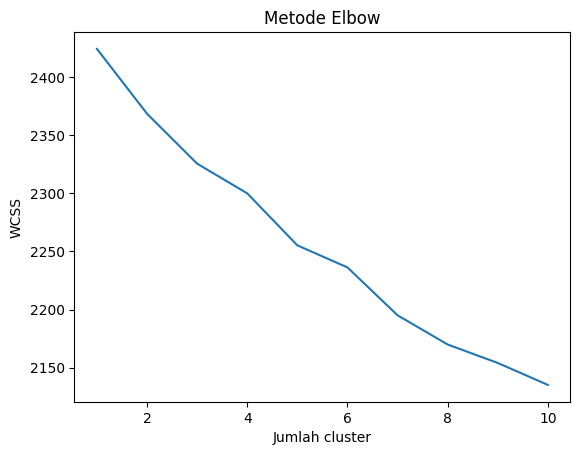

In [ ]:
# Membuat TF-IDF matrix
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(raw_data['comment_join'])

# Mencari nilai K yang optimal dengan metode elbow
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah cluster')
plt.ylabel('WCSS')
plt.show()

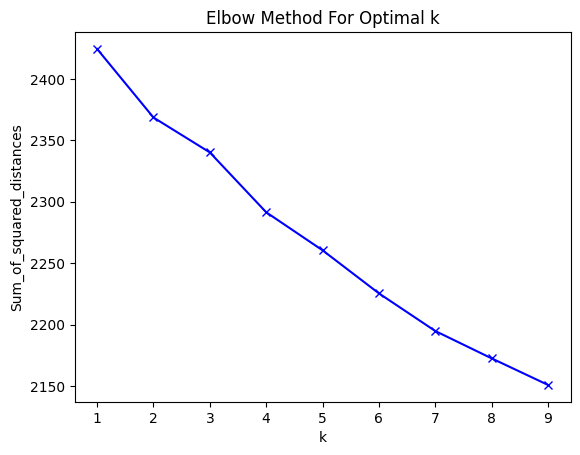

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
import seaborn as sns

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=6, random_state=100)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

Menambahkan kolom cluster, x0, x1 pada data frame df

In [ ]:
# assign clusters and pca vectors to our dataframe
raw_data['cluster'] = clusters
raw_data['x0'] = x0
raw_data['x1'] = x1

In [ ]:
raw_data.head()

,created_at,username,text,prepros_text,text_tokens_stemmed,text_list,TF_dict,TF-IDF_dict,TF_IDF_Vec,text_join,cluster,x0,x1,cluster_code,cluster_numeric
0,Fri Sep 22 16:05:37 +0000 2023,DahrinOde,Saya merasa sedih klu tokoh perempuan NU terba...,saya merasa sedih klu tokoh perempuan nu terba...,"['sedih', 'klu', 'tokoh', 'perempuan', 'nu', '...","[sedih, klu, tokoh, perempuan, nu, baik, jawa,...","{'sedih': 0.03225806451612903, 'klu': 0.032258...","{'sedih': 0.19484692617023916, 'klu': 0.159407...","[0.0056060211078747466, 0.0, 0.056518741464834...",sedih klu tokoh perempuan nu baik jawa timur d...,0,-0.037659,-0.055980,4.0,NaN
1,Mon Sep 18 08:38:13 +0000 2023,frenkyf1,@CutSarina5 @Puspen_TNI Ada dari keluarga kera...,tni ada dari keluarga kerajaan arab saudi masi...,"['tni', 'keluarga', 'raja', 'arab', 'saudi', '...","[tni, keluarga, raja, arab, saudi, turun, raja...","{'tni': 0.047619047619047616, 'keluarga': 0.04...","{'tni': 0.2802906681642931, 'keluarga': 0.1896...","[0.016551109937534964, 0.07187852097991357, 0....",tni keluarga raja arab saudi turun raja indone...,0,-0.062839,-0.131199,1.0,NaN
2,Fri Sep 01 02:37:57 +0000 2023,MulyadiSaediman,@SlametR06751672 Anies berhaji bukan di undang...,anies berhaji bukan di undang oleh kerajaan ta...,"['anies', 'haj', 'undang', 'raja', 'travel', '...","[anies, haj, undang, raja, travel, plus, kadun...","{'anies': 0.07407407407407407, 'haj': 0.037037...","{'anies': 0.01287308550697164, 'haj': 0.204793...","[0.01287308550697164, 0.0, 0.0, 0.0, 0.0, 0.0,...",anies haj undang raja travel plus kadung bicar...,0,-0.055172,-0.149951,1.0,NaN
3,Mon Aug 14 02:10:48 +0000 2023,AbaJijeh,"@ch_chotimah2 @erickthohir Haha, yg jlsÂ² aj p...",chotimah haha yg jls aj pak anies diundang ker...,"['chotimah', 'haha', 'jls', 'aj', 'anies', 'un...","[chotimah, haha, jls, aj, anies, undang, raja,...","{'chotimah': 0.05, 'haha': 0.05, 'jls': 0.05, ...","{'chotimah': 0.2393745871391023, 'haha': 0.302...","[0.008689332717205856, 0.0, 0.0, 0.0, 0.0, 0.0...",chotimah haha jls aj anies undang raja arab pe...,0,-0.051473,-0.147568,1.0,NaN
4,Wed Aug 09 16:05:41 +0000 2023,Orang_dalam10,Anies bersana keluarga selain menunaikan ibada...,anies bersana keluarga selain menunaikan ibada...,"['anies', 'sana', 'keluarga', 'tunai', 'ibadah...","[anies, sana, keluarga, tunai, ibadah, haji, u...","{'anies': 0.125, 'sana': 0.0625, 'keluarga': 0...","{'anies': 0.021723331793014642, 'sana': 0.3245...","[0.021723331793014642, 0.0, 0.1095050615881174...",anies sana keluarga tunai ibadah haji undang h...,0,-0.079093,-0.157421,1.0,NaN


In [ ]:
#Menampilkan 10 kata yang paling sering muncul pada masing-masing cluster
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    raw_data = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in raw_data.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

get_top_keywords(10)


Cluster 0
kawal,haji,baswedan,presiden,undang,anies,saudi,pendeta,arab,raja

Cluster 1
menang,baswedan,prabowo,imin,unggul,amin,pks,dukung,sukses,anies

Cluster 2
wawas,sukses,indonesia,aamiin,yangtegas,pasang,amin,jiwa,pkb,pimpin

Cluster 3
fpi,belakang,hti,baswedan,dukung,anies,anis,intoleran,radikal,ormas

Cluster 4
rasulullah,kadrun,baswedan,abah,aos,rocky,gerung,anies,imam,mahdi

Cluster 5
kader,partai,plate,nasdem,bukti,formula,anies,kpk,tangkap,korupsi


In [ ]:
#Melihat Distribusi Sentimen
from collections import Counter

Counter(raw_data['cluster'])

Counter({0: 489, 4: 309, 1: 1026, 5: 309, 3: 292, 2: 95})

In [ ]:
from wordcloud import WordCloud

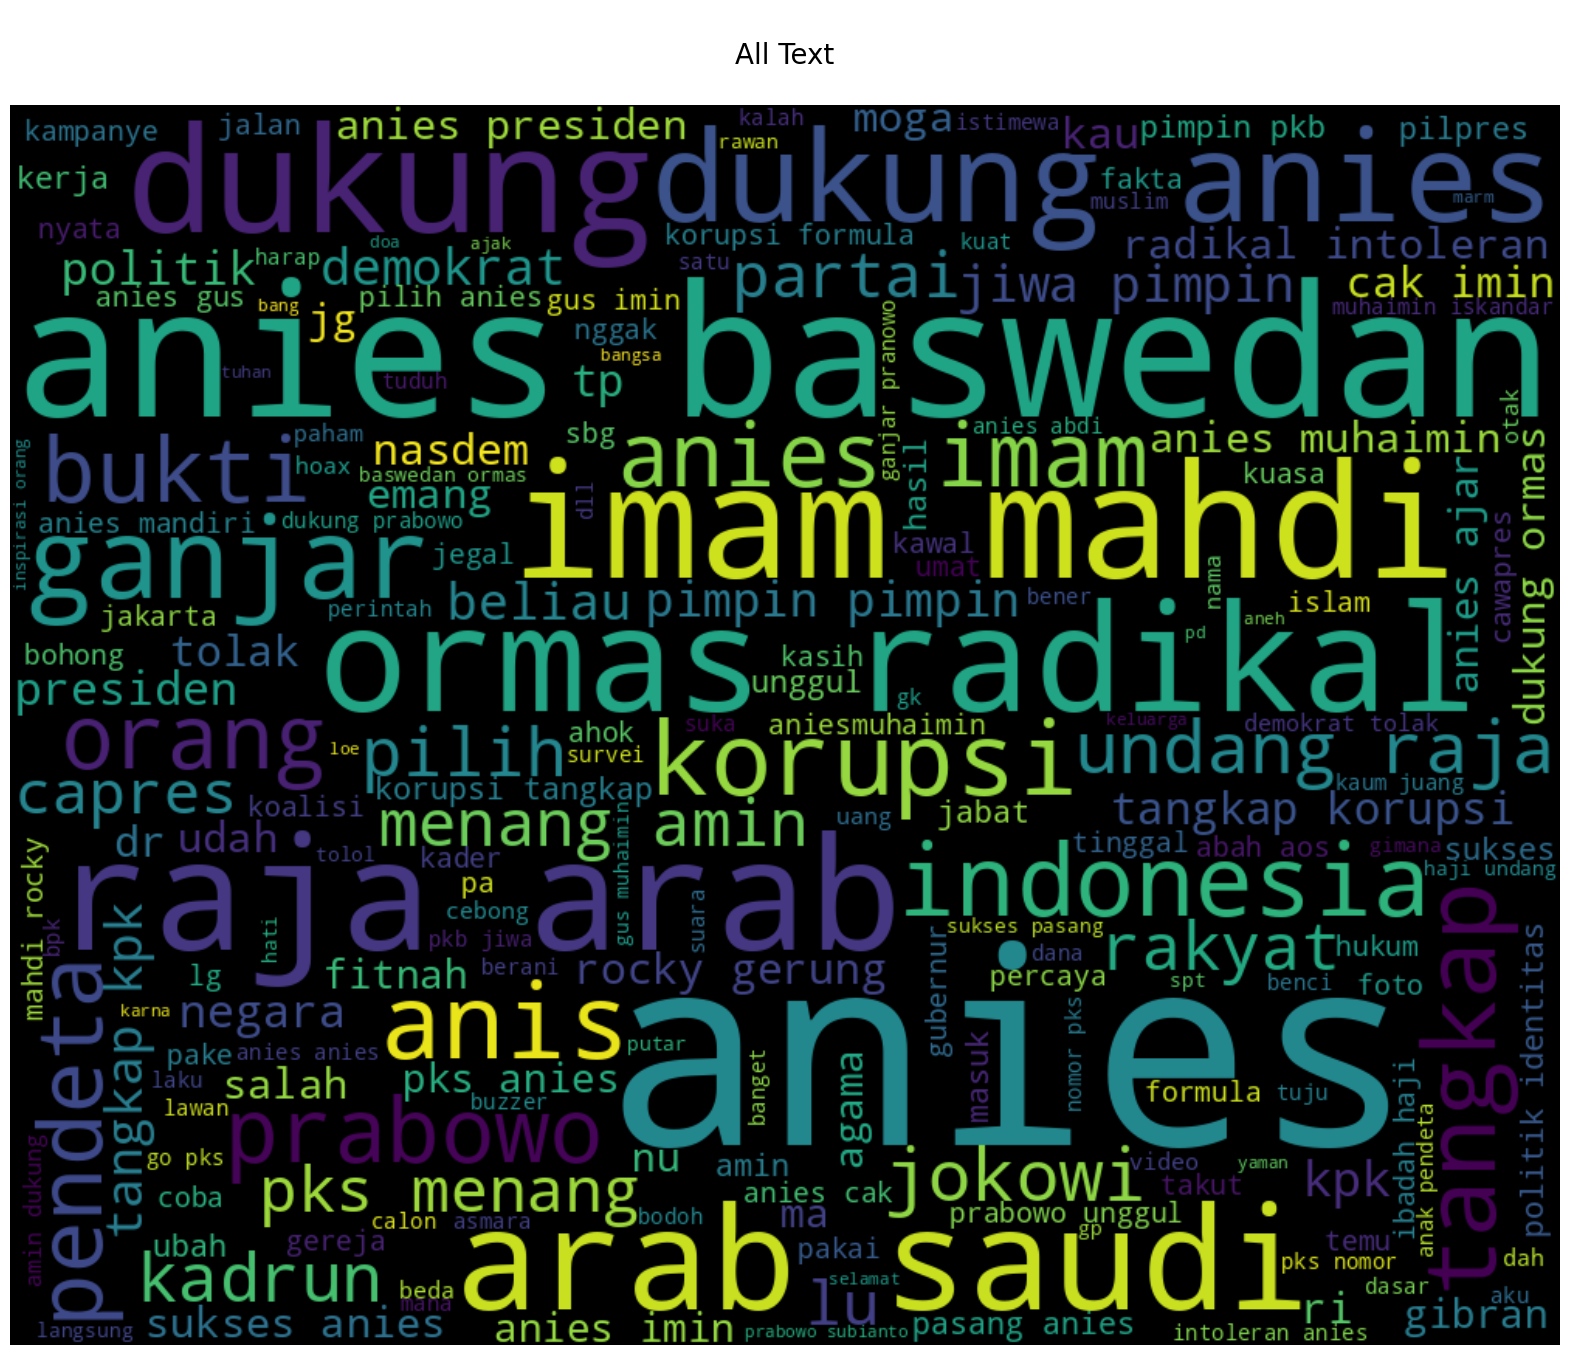

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
firstcloud_all = WordCloud(
    background_color='black',
    width=1000,
    height=800
).generate(" ".join(raw_data['text_join']))
ax.imshow(firstcloud_all, interpolation='bilinear')
ax.set_title('\nAll Text\n', fontsize=20)
ax.axis('off')
plt.show()

(-0.5, 999.5, 799.5, -0.5)

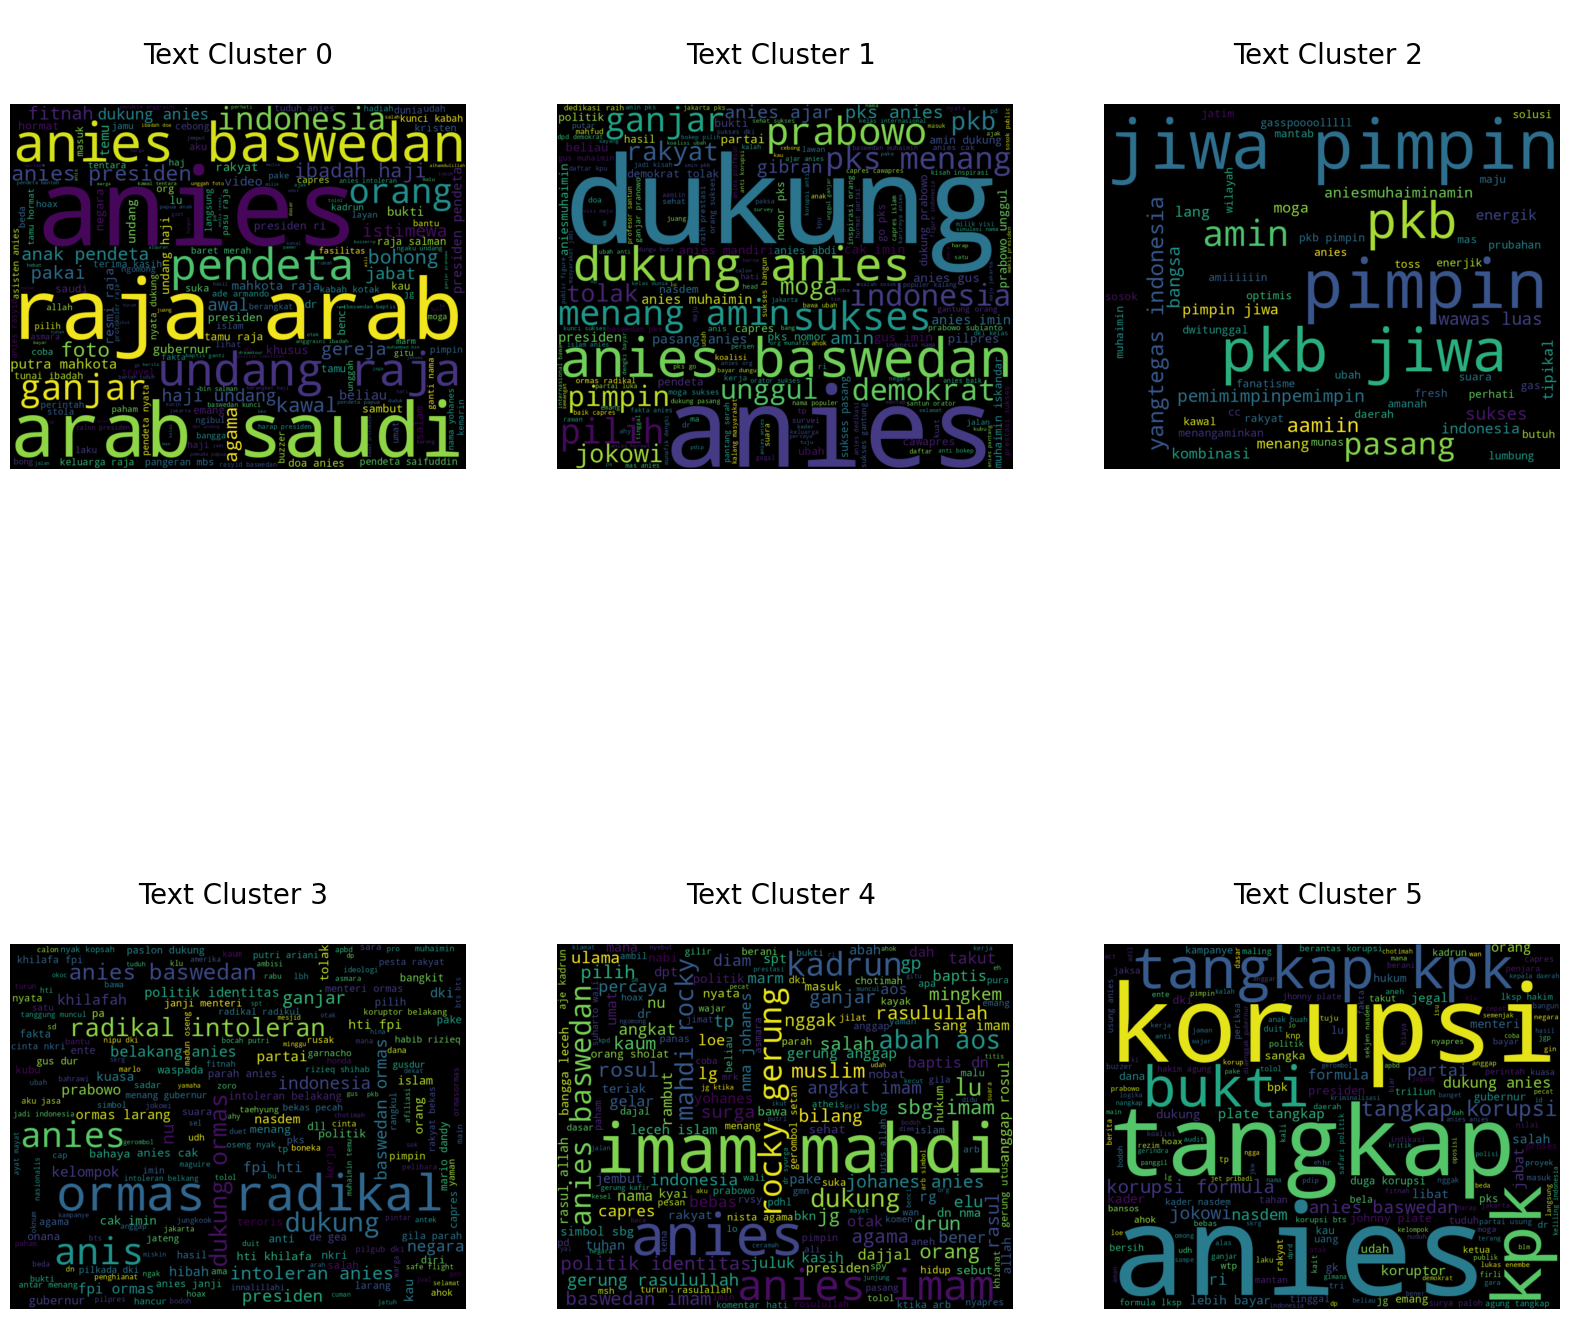

In [ ]:
fig, ax = plt.subplots(2, 3, figsize  = (20,20))
firstcloud_0=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==0]['text_join']))
firstcloud_1=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==1]['text_join']))
firstcloud_2=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==2]['text_join']))
firstcloud_3=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==3]['text_join']))
firstcloud_4=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==4]['text_join']))
firstcloud_5=WordCloud(
                          background_color='black',
                          width=1000,
                          height=800
                         ).generate(" ".join(raw_data[raw_data['cluster']==5]['text_join']))

ax[0, 0].imshow(firstcloud_0, interpolation='bilinear')
ax[0, 0].set_title('\nText Cluster 0\n', fontsize=20)
ax[0, 0].axis('off')
print('\n')
ax[0, 1].imshow(firstcloud_1, interpolation='bilinear')
ax[0, 1].set_title('\nText Cluster 1 \n', fontsize=20)
ax[0, 1].axis('off')
print('\n')
ax[0, 2].imshow(firstcloud_2, interpolation='bilinear')
ax[0, 2].set_title('\nText Cluster 2 \n', fontsize=20)
ax[0, 2].axis('off')
print('\n')
ax[1, 0].imshow(firstcloud_3, interpolation='bilinear')
ax[1, 0].set_title('\nText Cluster 3 \n', fontsize=20)
ax[1, 0].axis('off')
print('\n')
ax[1, 1].imshow(firstcloud_4, interpolation='bilinear')
ax[1, 1].set_title('\nText Cluster 4 \n', fontsize=20)
ax[1, 1].axis('off')
print('\n')
ax[1, 2].imshow(firstcloud_5, interpolation='bilinear')
ax[1, 2].set_title('\nText Cluster 5 \n', fontsize=20)
ax[1, 2].axis('off')

In [ ]:
# map clusters to appropriate labels
cluster_map = {0: "Cluster 0", 1: "Cluster 1", 2: "Cluster 2", 3: "Cluster 3", 4: "Cluster 4", 5: "Cluster 5"}
# apply mapping
raw_data['cluster'] = raw_data['cluster'].map(cluster_map)

In [ ]:
raw_data['cluster']

0       Cluster 0
1       Cluster 0
2       Cluster 0
3       Cluster 0
4       Cluster 0
          ...    
2515    Cluster 1
2516    Cluster 2
2517    Cluster 1
2518    Cluster 2
2519    Cluster 2
Name: cluster, Length: 2520, dtype: object

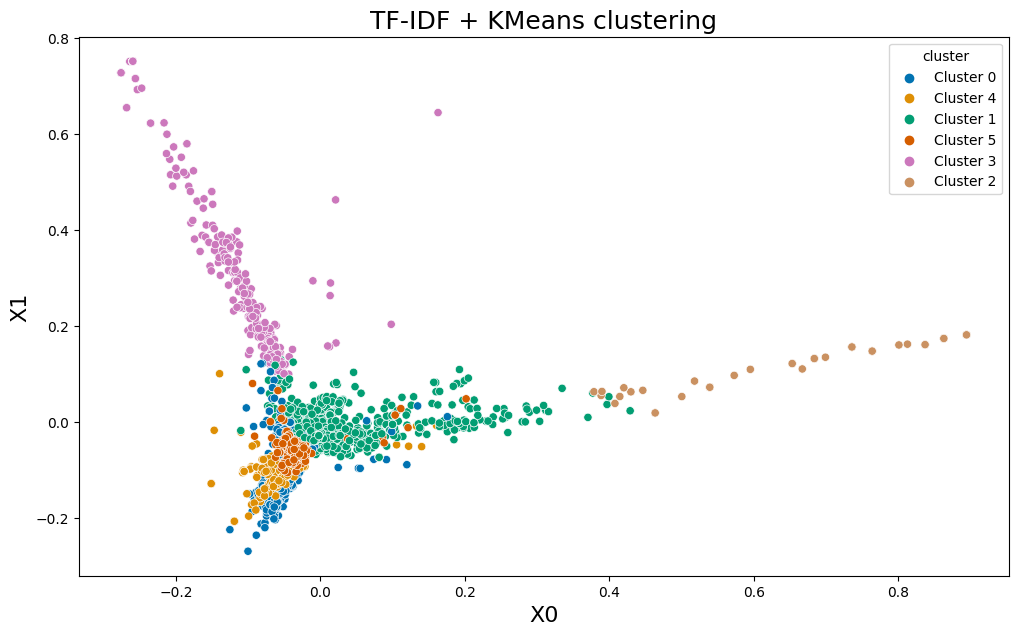

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=raw_data, x='x0', y='x1', hue='cluster', palette="colorblind")
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

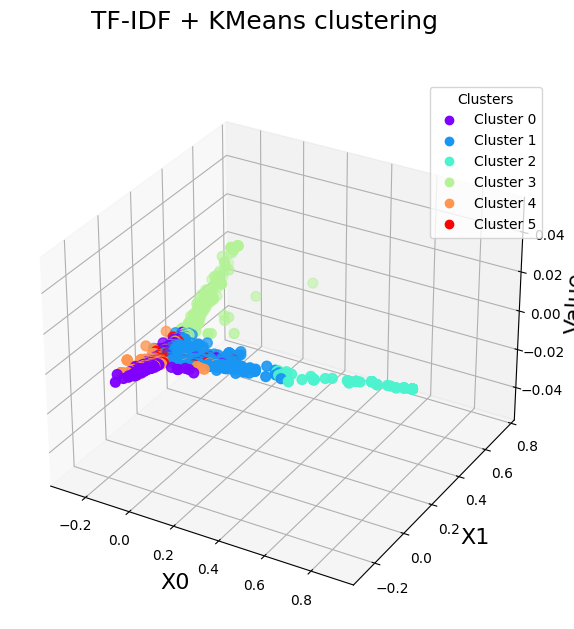

In [ ]:
# Membuat dictionary untuk mengonversi nama klaster menjadi angka
cluster_dict = {'Cluster 0': 0, 'Cluster 1': 1, 'Cluster 2': 2, 'Cluster 3': 3, 'Cluster 4': 4, 'Cluster 5': 5}

# Mengonversi kolom cluster menjadi angka menggunakan dictionary yang telah dibuat
raw_data['cluster_numeric'] = raw_data['cluster'].map(cluster_dict)

# Set image size
fig = plt.figure(figsize=(12, 7))
# Set a title
fig.suptitle("TF-IDF + KMeans clustering", fontsize=18)
# Add 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot with seaborn, where hue is the class used to group the data
scatter = ax.scatter(raw_data['x0'], raw_data['x1'], [0] * len(raw_data), c=raw_data['cluster_numeric'], marker='o', s=50, cmap='rainbow')
# Set axes names
ax.set_xlabel("X0", fontsize=16)
ax.set_ylabel("X1", fontsize=16)
ax.set_zlabel("Value", fontsize=16)

# Add legend for clusters
handles, labels = scatter.legend_elements(prop="colors")
legend = ax.legend(handles, cluster_dict.keys(), loc="upper right", title="Clusters")

# Show the plot
plt.show()

In [ ]:
datafinal = raw_data[["created_at", "username", "text", "prepros_text","text_join","cluster"]]

In [ ]:
datafinal

,created_at,username,text,prepros_text,text_join,cluster
0,Fri Sep 22 16:05:37 +0000 2023,DahrinOde,Saya merasa sedih klu tokoh perempuan NU terba...,saya merasa sedih klu tokoh perempuan nu terba...,sedih klu tokoh perempuan nu baik jawa timur d...,Cluster 0
1,Mon Sep 18 08:38:13 +0000 2023,frenkyf1,@CutSarina5 @Puspen_TNI Ada dari keluarga kera...,tni ada dari keluarga kerajaan arab saudi masi...,tni keluarga raja arab saudi turun raja indone...,Cluster 0
2,Fri Sep 01 02:37:57 +0000 2023,MulyadiSaediman,@SlametR06751672 Anies berhaji bukan di undang...,anies berhaji bukan di undang oleh kerajaan ta...,anies haj undang raja travel plus kadung bicar...,Cluster 0
3,Mon Aug 14 02:10:48 +0000 2023,AbaJijeh,"@ch_chotimah2 @erickthohir Haha, yg jlsÂ² aj p...",chotimah haha yg jls aj pak anies diundang ker...,chotimah haha jls aj anies undang raja arab pe...,Cluster 0
4,Wed Aug 09 16:05:41 +0000 2023,Orang_dalam10,Anies bersana keluarga selain menunaikan ibada...,anies bersana keluarga selain menunaikan ibada...,anies sana keluarga tunai ibadah haji undang h...,Cluster 0
...,...,...,...,...,...,...
2515,Sat Oct 21 23:27:10 +0000 2023,wahyuni_fanzian,@voiceofpkb @aniesbaswedan @cakimiNOW Tetap se...,tetap semangat gus,semangat gus,Cluster 1
2516,Sat Oct 21 23:27:06 +0000 2023,Syaripudinshi,"Berjiwa Pemimpin, Pemimpin Tegas... AMIN #AMI...",berjiwa pemimpin pemimpin tegas amin pkb,jiwa pimpin pimpin amin pkb,Cluster 2
2517,Sat Oct 21 23:27:05 +0000 2023,SintaPinasty,AKIN #AMINkanIndonesia https://t.co/fKGGCLKdb9,akin,akin,Cluster 1
2518,Sat Oct 21 23:27:04 +0000 2023,MafruhiAsta,#AMINkanIndonesia #AniesMuhaimin2024 Berjiwa ...,berjiwa pemimpin pemimpin tegas pkb,jiwa pimpin pimpin pkb,Cluster 2


In [ ]:
#Menampilkan 10 kata yang paling sering muncul pada masing-masing cluster
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    raw_data = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in raw_data.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

get_top_keywords(10)


Cluster 0
kawal,haji,baswedan,presiden,undang,anies,saudi,pendeta,arab,raja

Cluster 1
menang,baswedan,prabowo,imin,unggul,amin,pks,dukung,sukses,anies

Cluster 2
wawas,sukses,indonesia,aamiin,yangtegas,pasang,amin,jiwa,pkb,pimpin

Cluster 3
fpi,belakang,hti,baswedan,dukung,anies,anis,intoleran,radikal,ormas

Cluster 4
rasulullah,kadrun,baswedan,abah,aos,rocky,gerung,anies,imam,mahdi

Cluster 5
kader,partai,plate,nasdem,bukti,formula,anies,kpk,tangkap,korupsi


In [ ]:
raw_data['cluster'].value_counts()

Cluster 1    1026
Cluster 0     489
Cluster 4     309
Cluster 5     309
Cluster 3     292
Cluster 2      95
Name: cluster, dtype: int64

In [ ]:
# Mengubah nilai cluster sesuai dengan permintaan
datafinal['cluster'] = datafinal['cluster'].replace({'Cluster 0': 'black-campaign', 'Cluster 1': 'nonblack-campaign', 'Cluster 2': 'nonblack-campaign', 'Cluster 3': 'black-campaign', 'Cluster 4': 'black-campaign', 'Cluster 5': 'black-campaign'})

# Mengubah nama kolom 'cluster' menjadi 'label'
datafinal.rename(columns={'cluster': 'label'}, inplace=True)

<ipython-input-180-f5b4dd94e355>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafinal['cluster'] = datafinal['cluster'].replace({'Cluster 0': 'black-campaign', 'Cluster 1': 'nonblack-campaign', 'Cluster 2': 'nonblack-campaign', 'Cluster 3': 'black-campaign', 'Cluster 4': 'black-campaign', 'Cluster 5': 'black-campaign'})
<ipython-input-180-f5b4dd94e355>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafinal.rename(columns={'cluster': 'label'}, inplace=True)


In [ ]:
Counter(datafinal['label'])

Counter({'black-campaign': 1399, 'nonblack-campaign': 1121})

In [ ]:
# Menyimpan DataFrame ke dalam file CSV
datafinal.to_csv('anies-final.csv', index=False)

In [ ]:
# Membaca kembali file CSV yang disimpan
df = pd.read_csv('/content/anies-final.csv')
df

,created_at,username,text,prepros_text,text_join,label
0,Fri Sep 22 16:05:37 +0000 2023,DahrinOde,Saya merasa sedih klu tokoh perempuan NU terba...,saya merasa sedih klu tokoh perempuan nu terba...,sedih klu tokoh perempuan nu baik jawa timur d...,black-campaign
1,Mon Sep 18 08:38:13 +0000 2023,frenkyf1,@CutSarina5 @Puspen_TNI Ada dari keluarga kera...,tni ada dari keluarga kerajaan arab saudi masi...,tni keluarga raja arab saudi turun raja indone...,black-campaign
2,Fri Sep 01 02:37:57 +0000 2023,MulyadiSaediman,@SlametR06751672 Anies berhaji bukan di undang...,anies berhaji bukan di undang oleh kerajaan ta...,anies haj undang raja travel plus kadung bicar...,black-campaign
3,Mon Aug 14 02:10:48 +0000 2023,AbaJijeh,"@ch_chotimah2 @erickthohir Haha, yg jlsÂ² aj p...",chotimah haha yg jls aj pak anies diundang ker...,chotimah haha jls aj anies undang raja arab pe...,black-campaign
4,Wed Aug 09 16:05:41 +0000 2023,Orang_dalam10,Anies bersana keluarga selain menunaikan ibada...,anies bersana keluarga selain menunaikan ibada...,anies sana keluarga tunai ibadah haji undang h...,black-campaign
...,...,...,...,...,...,...
2515,Sat Oct 21 23:27:10 +0000 2023,wahyuni_fanzian,@voiceofpkb @aniesbaswedan @cakimiNOW Tetap se...,tetap semangat gus,semangat gus,nonblack-campaign
2516,Sat Oct 21 23:27:06 +0000 2023,Syaripudinshi,"Berjiwa Pemimpin, Pemimpin Tegas... AMIN #AMI...",berjiwa pemimpin pemimpin tegas amin pkb,jiwa pimpin pimpin amin pkb,nonblack-campaign
2517,Sat Oct 21 23:27:05 +0000 2023,SintaPinasty,AKIN #AMINkanIndonesia https://t.co/fKGGCLKdb9,akin,akin,nonblack-campaign
2518,Sat Oct 21 23:27:04 +0000 2023,MafruhiAsta,#AMINkanIndonesia #AniesMuhaimin2024 Berjiwa ...,berjiwa pemimpin pemimpin tegas pkb,jiwa pimpin pimpin pkb,nonblack-campaign
